This is the template for the image recognition exercise. <Br>
Some **general instructions**, read these carefully:
 - The final assignment is returned as a clear and understandable *report*
    - define shortly the concepts and explain the phases you use
    - use the Markdown feature of the notebook for larger explanations
 - return your output as a *working* Jupyter notebook
 - name your file as Exercise_MLPR2023_Partx_uuid.jpynb
    - use the uuid code determined below
    - use this same code for each part of the assignment
 - write easily readable code with comments     
     - if you exploit code from web, provide a reference
 - it is ok to discuss with a friend about the assignment. But it is not ok to copy someone's work. Everyone should submit their own implementation
     - in case of identical submissions, both submissions are failed 

**Deadlines:**
- Part 1: Mon 6.2 at 23:59
- Part 2: Mon 20.2 at 23:59
- Part 3: Mon 6.3 at 23:59

**No extensions for the deadlines** <br>
- after each deadline, example results are given, and it is not possible to submit anymore

**If you encounter problems, Google first and if you can’t find an answer, ask for help**
- Moodle area for questions
- pekavir@utu.fi
- teacher available for questions
    - Monday 30.1 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Monday 13.2 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Thursday 2.3 at lecture 10:15-12:00 

**Grading**

The exercise covers a part of the grading in this course. The course exam has 5 questions, 6 points of each. Exercise gives 6 points, i.e. the total score is 36 points.

From the template below, you can see how many exercise points can be acquired from each task. Exam points are given according to the table below: <br>
<br>
7 exercise points: 1 exam point <br>
8 exercise points: 2 exam points <br>
9 exercise points: 3 exam points <br>
10 exercise points: 4 exam points <br>
11 exercise points: 5 exam points <br>
12 exercise points: 6 exam points <br>
<br>
To pass the exercise, you need at least 7 exercise points, and at least 1 exercise point from each Part.
    
Each student will grade one submission from a peer and their own submission. After each Part deadline, example results are given. Study them carefully and perform the grading according to the given instructions. Mean value from the peer grading and self-grading is used for the final points. 

In [1]:
import uuid
# Run this cell only once and save the code. Use the same id code for each Part.
# Printing random id using uuid1()
print ("The id code is: ",end="")
print (uuid.uuid1())

The id code is: 9e11fa16-a3eb-11ed-84c0-a7b78d3d0209


# Part 1

Read the original research article:

İ. Çınar and M. Koklu. Identification of rice varieties using machine learning algorithms. Journal of Agricultural Sciences, 28(2):307–325, 2022. doi: 10.15832/ankutbd.862482.

https://dergipark.org.tr/en/download/article-file/1513632

## Introduction (1 p)

Will be written in Part 3

## Preparations of the data (1 p)

Make three folders in your working folder: "notebooks", "data" and "training_data". Save this notebook in "notebooks" folder.
<br> <br>
Perform preparations for the data
- import all the packages needed for this notebook in one cell 
- import the images. Data can be found from (downloading starts as you press the link) https://www.muratkoklu.com/datasets/vtdhnd09.php <br>
    - save the data folders "Arborio", "Basmati" and "Jasmine" in "data" folder 
- take a random sample of 100 images from Arborio, Basmati and Jasmine rice species (i.e. 300 images in total) 
- determine the contour of each rice (you can use e.g. *findContours* from OpenCV) 
- plot one example image of each rice species, including the contour 

In [1]:
# necessary packages
import numpy as np
import pandas as pd
import sklearn as skl
import skimage as ski
import cv2 as cv
import scipy as sp
import os
import random
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter

%matplotlib inline

In [2]:
# choose 100 random images or use already generated list
image_numbers = []
file_path = Path("./chosen_data.txt")
if file_path.is_file():
    with open("./chosen_data.txt") as f:
        for line in f:
            image_numbers.append(int(line.strip("\n")))
    print("Used existing file!")
else:
    while len(image_numbers) < 100:
        num = random.randint(1,15000)
        if num in image_numbers:
            continue
        image_numbers.append(num)
    image_numbers.sort()
    with open("./chosen_data.txt", "w") as f:
        for num in image_numbers:
            f.write(str(num) + "\n")
    print("Created new list of images to use!")

Used existing file!


In [3]:
# get arborio contours
arborio_images = []
arborio_contours = []
for ind in image_numbers:
    datapath = f"../data/Arborio/Arborio ({ind}).jpg"
    image1 = cv.imread(datapath)
    arborio_images.append(image1)
    imgray = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(imgray, 127, 255, 0)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    arborio_contours.append(contours)

# basmati
basmati_images = []
basmati_contours = []
for ind in image_numbers:
    datapath = f"../data/Basmati/Basmati ({ind}).jpg"
    image2 = cv.imread(datapath)
    basmati_images.append(image2)
    imgray = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(imgray, 127, 255, 0)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    basmati_contours.append(contours)

# jasmine
jasmine_images = []
jasmine_contours = []
for ind in image_numbers:
    datapath = f"../data/Jasmine/Jasmine ({ind}).jpg"
    image3 = cv.imread(datapath)
    jasmine_images.append(image3)
    imgray = cv.cvtColor(image3, cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(imgray, 127, 255, 0)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    jasmine_contours.append(contours)

# block of code to get contours working from OpenCV documentation https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html

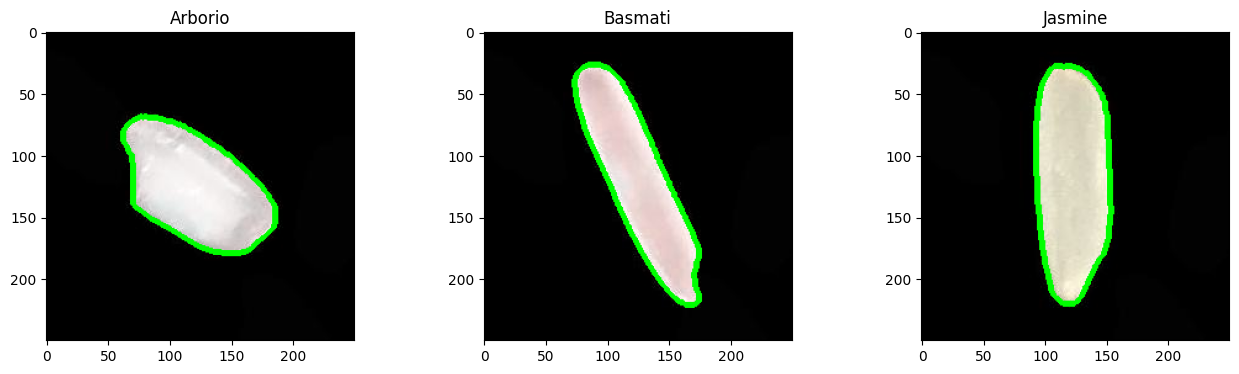

In [4]:
# plot example rice with contours
image1 = arborio_images[99].copy()
image2 = basmati_images[99].copy()
image3 = jasmine_images[99].copy()
fig, axes = plt.subplots(1,3, figsize=(16,4))
axes[0].set_title("Arborio")
axes[1].set_title("Basmati")
axes[2].set_title("Jasmine")
axes[0].imshow(cv.drawContours(image1, arborio_contours[99], -1, (0,255,0), 3))
axes[1].imshow(cv.drawContours(image2, basmati_contours[99], -1, (0,255,0), 3))
axes[2].imshow(cv.drawContours(image3, jasmine_contours[99], -1, (0,255,0), 3))

## Feature extraction (2 p)

Gather the feature data <br>
<br>
Color features (15) <br>
- Calculate the following color features for each image, including only the pixels within the contour (you can use e.g. *pointPolygonTest* from OpenCV)
    - Mean for each RGB color channel 
    - Variance for each RGB color channel 
    - Skewness for each RGB color channel 
    - Kurtosis for each RGB color channel 
    - Entropy for each RGB color channel 
    
Dimension features (6) <br>
- Fit an ellipse to the contour points (you can use e.g. *fitEllipse* from OpenCV) 
- Plot one example image of each rice species including the fitted ellipse 
- Calculate the following features for each image (for details, see the original article)
    - the major axis length the ellipse 
    - the minor axis length of the ellipse 
    - area inside the contour (you can use e.g. *contourArea* from OpenCV) 
    - perimeter of the contour (you can use e.g. *arcLength* from OpenCV) 
    - roundness 
    - aspect ratio 
    
Gather all the features in one array or dataframe: one data point in one row, including all feature values in columns.  <br>
For each data point, include also information of the original image and the label (rice species). Save the data in "training_data" folder. 

In [5]:
# convert images to RGB because that order is easier to remember
for i in range(100):
    arborio_images[i] = cv.cvtColor(arborio_images[i], cv.COLOR_BGR2RGB)
    basmati_images[i] = cv.cvtColor(basmati_images[i], cv.COLOR_BGR2RGB)
    jasmine_images[i] = cv.cvtColor(jasmine_images[i], cv.COLOR_BGR2RGB)

In [6]:
# initialise dataframes
arborio_df = pd.DataFrame()
basmati_df = pd.DataFrame()
jasmine_df = pd.DataFrame()

In [7]:
# find RGB related data in arborio images
arborio_red_means = []
arborio_green_means = []
arborio_blue_means = []
arborio_red_var = []
arborio_green_var = []
arborio_blue_var = []
arborio_red_skew = []
arborio_green_skew = []
arborio_blue_skew = []
arborio_red_kurt = []
arborio_green_kurt = []
arborio_blue_kurt = []
arborio_red_ent = []
arborio_green_ent = []
arborio_blue_ent = []
for i in range(100):
    current_img = arborio_images[i]
    arborio_rgb = []
    for row in range(len(current_img)):
        for col in range(len(current_img[row])):
            if cv.pointPolygonTest(np.reshape(arborio_contours[i][0], (len(arborio_contours[i][0]),2)), pt=(row, col), measureDist=False) == 1:
                arborio_rgb.append(current_img[row][col])
    # calculate mean for each channel
    red_mean = np.mean([point[0] for point in arborio_rgb])
    green_mean = np.mean([point[1] for point in arborio_rgb])
    blue_mean = np.mean([point[2] for point in arborio_rgb])
    arborio_red_means.append(red_mean)
    arborio_green_means.append(green_mean)
    arborio_blue_means.append(blue_mean)
    # calculate variance for colour channels
    arborio_red_var.append(np.var([point[0] for point in arborio_rgb]))
    arborio_green_var.append(np.var([point[1] for point in arborio_rgb]))
    arborio_blue_var.append(np.var([point[2] for point in arborio_rgb]))
    # calculate skewness
    arborio_red_skew.append(sp.stats.skew([point[0] for point in arborio_rgb]))
    arborio_green_skew.append(sp.stats.skew([point[1] for point in arborio_rgb]))
    arborio_blue_skew.append(sp.stats.skew([point[2] for point in arborio_rgb]))
    # calculate kurtosis
    arborio_red_kurt.append(sp.stats.kurtosis([point[0] for point in arborio_rgb]))
    arborio_green_kurt.append(sp.stats.kurtosis([point[1] for point in arborio_rgb]))
    arborio_blue_kurt.append(sp.stats.kurtosis([point[2] for point in arborio_rgb]))
    # calculate entropy
    # get number of occurences to calculate probabilities
    red_occ = Counter([point[0] for point in arborio_rgb])
    green_occ = Counter([point[1] for point in arborio_rgb])
    blue_occ = Counter([point[2] for point in arborio_rgb])
    red_occ = [red_occ[key]/len(arborio_rgb) for key in red_occ] # normalise by dividing with amount of all pixels
    green_occ = [green_occ[key]/len(arborio_rgb) for key in green_occ]
    blue_occ = [blue_occ[key]/len(arborio_rgb) for key in blue_occ]
    # finally calculate entropy
    arborio_red_ent.append(sp.stats.entropy(red_occ, base=2))
    arborio_green_ent.append(sp.stats.entropy(green_occ, base=2))
    arborio_blue_ent.append(sp.stats.entropy(blue_occ, base=2))

    

In [8]:
# create arborio dataframe
arborio_names = []
for ind in image_numbers:
    arborio_names.append(f"Arborio ({ind})")

# now to add columns
arborio_df["img_name"] = arborio_names
arborio_df["class"] = ["Arborio" for i in range(100)]
arborio_df["r_ch_mean"] = arborio_red_means
arborio_df["g_ch_mean"] = arborio_green_means
arborio_df["b_ch_mean"] = arborio_blue_means
arborio_df["r_ch_var"] = arborio_red_var
arborio_df["g_ch_var"] = arborio_green_var
arborio_df["b_ch_var"] = arborio_blue_var
arborio_df["r_ch_skew"] = arborio_red_skew
arborio_df["g_ch_skew"] = arborio_green_skew
arborio_df["b_ch_skew"] = arborio_blue_skew
arborio_df["r_ch_kurt"] = arborio_red_kurt
arborio_df["g_ch_kurt"] = arborio_green_kurt
arborio_df["b_ch_kurt"] = arborio_blue_kurt
arborio_df["r_ch_entr"] = arborio_red_ent
arborio_df["g_ch_entr"] = arborio_green_ent
arborio_df["b_ch_entr"] = arborio_blue_ent

In [9]:
# check that data has been assembled correctly
display(arborio_df[:5])

,img_name,class,r_ch_mean,g_ch_mean,b_ch_mean,r_ch_var,g_ch_var,b_ch_var,r_ch_skew,g_ch_skew,b_ch_skew,r_ch_kurt,g_ch_kurt,b_ch_kurt,r_ch_entr,g_ch_entr,b_ch_entr
0,Arborio (40),Arborio,188.911583,190.416081,198.192719,3247.204862,3316.704583,3469.948943,-2.703472,-2.684168,-2.726133,6.035695,5.961688,6.106680,6.045563,6.091364,6.061150
1,Arborio (497),Arborio,127.394872,128.387719,133.990148,10129.328287,10292.130780,11110.573857,-0.437042,-0.434355,-0.435771,-1.756924,-1.756236,-1.755517,4.819866,4.877391,5.080827
2,Arborio (618),Arborio,214.832157,215.252165,220.199814,3993.607635,4034.882064,4091.399531,-2.840389,-2.818786,-2.890622,6.751507,6.660521,6.955443,5.866805,5.888371,5.744295
3,Arborio (646),Arborio,191.939456,194.598039,199.078775,1669.888663,1722.853047,1735.316808,-3.904036,-3.862791,-3.936848,15.113362,14.868798,15.278504,5.806323,5.875341,5.803781
4,Arborio (839),Arborio,130.941315,131.168964,135.283707,11312.365074,11361.059937,11965.127991,-0.400995,-0.399494,-0.404183,-1.810664,-1.810119,-1.811003,4.333831,4.345524,4.567716


In [10]:
# now let's do the same for basmati and jasmine
basmati_red_means = []
basmati_green_means = []
basmati_blue_means = []
basmati_red_var = []
basmati_green_var = []
basmati_blue_var = []
basmati_red_skew = []
basmati_green_skew = []
basmati_blue_skew = []
basmati_red_kurt = []
basmati_green_kurt = []
basmati_blue_kurt = []
basmati_red_ent = []
basmati_green_ent = []
basmati_blue_ent = []
for i in range(100):
    current_img = basmati_images[i]
    basmati_rgb = []
    for row in range(len(current_img)):
        for col in range(len(current_img[row])):
            if cv.pointPolygonTest(np.reshape(basmati_contours[i][0], (len(basmati_contours[i][0]),2)), pt=(row, col), measureDist=False) == 1:
                basmati_rgb.append(current_img[row][col])
    # calculate mean for each channel
    red_mean = np.mean([point[0] for point in basmati_rgb])
    green_mean = np.mean([point[1] for point in basmati_rgb])
    blue_mean = np.mean([point[2] for point in basmati_rgb])
    basmati_red_means.append(red_mean)
    basmati_green_means.append(green_mean)
    basmati_blue_means.append(blue_mean)
    # calculate variance for colour channels
    basmati_red_var.append(np.var([point[0] for point in basmati_rgb]))
    basmati_green_var.append(np.var([point[1] for point in basmati_rgb]))
    basmati_blue_var.append(np.var([point[2] for point in basmati_rgb]))
    # calculate skewness
    basmati_red_skew.append(sp.stats.skew([point[0] for point in basmati_rgb]))
    basmati_green_skew.append(sp.stats.skew([point[1] for point in basmati_rgb]))
    basmati_blue_skew.append(sp.stats.skew([point[2] for point in basmati_rgb]))
    # calculate kurtosis
    basmati_red_kurt.append(sp.stats.kurtosis([point[0] for point in basmati_rgb]))
    basmati_green_kurt.append(sp.stats.kurtosis([point[1] for point in basmati_rgb]))
    basmati_blue_kurt.append(sp.stats.kurtosis([point[2] for point in basmati_rgb]))
    # calculate entropy
    # get number of occurences to calculate probabilities
    red_occ = Counter([point[0] for point in basmati_rgb])
    green_occ = Counter([point[1] for point in basmati_rgb])
    blue_occ = Counter([point[2] for point in basmati_rgb])
    red_occ = [red_occ[key]/len(basmati_rgb) for key in red_occ] # normalise by dividing with amount of all pixels
    green_occ = [green_occ[key]/len(basmati_rgb) for key in green_occ]
    blue_occ = [blue_occ[key]/len(basmati_rgb) for key in blue_occ]
    # finally calculate entropy
    basmati_red_ent.append(sp.stats.entropy(red_occ, base=2))
    basmati_green_ent.append(sp.stats.entropy(green_occ, base=2))
    basmati_blue_ent.append(sp.stats.entropy(blue_occ, base=2))

In [11]:
# create basmati dataframe
basmati_names = []
for ind in image_numbers:
    basmati_names.append(f"Basmati ({ind})")

# now to add columns
basmati_df["img_name"] = basmati_names
basmati_df["class"] = ["Basmati" for i in range(100)]
basmati_df["r_ch_mean"] = basmati_red_means
basmati_df["g_ch_mean"] = basmati_green_means
basmati_df["b_ch_mean"] = basmati_blue_means
basmati_df["r_ch_var"] = basmati_red_var
basmati_df["g_ch_var"] = basmati_green_var
basmati_df["b_ch_var"] = basmati_blue_var
basmati_df["r_ch_skew"] = basmati_red_skew
basmati_df["g_ch_skew"] = basmati_green_skew
basmati_df["b_ch_skew"] = basmati_blue_skew
basmati_df["r_ch_kurt"] = basmati_red_kurt
basmati_df["g_ch_kurt"] = basmati_green_kurt
basmati_df["b_ch_kurt"] = basmati_blue_kurt
basmati_df["r_ch_entr"] = basmati_red_ent
basmati_df["g_ch_entr"] = basmati_green_ent
basmati_df["b_ch_entr"] = basmati_blue_ent

In [12]:
# jasmine
jasmine_red_means = []
jasmine_green_means = []
jasmine_blue_means = []
jasmine_red_var = []
jasmine_green_var = []
jasmine_blue_var = []
jasmine_red_skew = []
jasmine_green_skew = []
jasmine_blue_skew = []
jasmine_red_kurt = []
jasmine_green_kurt = []
jasmine_blue_kurt = []
jasmine_red_ent = []
jasmine_green_ent = []
jasmine_blue_ent = []
for i in range(100):
    current_img = jasmine_images[i]
    jasmine_rgb = []
    for row in range(len(current_img)):
        for col in range(len(current_img[row])):
            if cv.pointPolygonTest(np.reshape(jasmine_contours[i][0], (len(jasmine_contours[i][0]),2)), pt=(row, col), measureDist=False) == 1:
                jasmine_rgb.append(current_img[row][col])
    # calculate mean for each channel
    red_mean = np.mean([point[0] for point in jasmine_rgb])
    green_mean = np.mean([point[1] for point in jasmine_rgb])
    blue_mean = np.mean([point[2] for point in jasmine_rgb])
    jasmine_red_means.append(red_mean)
    jasmine_green_means.append(green_mean)
    jasmine_blue_means.append(blue_mean)
    # calculate variance for colour channels
    jasmine_red_var.append(np.var([point[0] for point in jasmine_rgb]))
    jasmine_green_var.append(np.var([point[1] for point in jasmine_rgb]))
    jasmine_blue_var.append(np.var([point[2] for point in jasmine_rgb]))
    # calculate skewness
    jasmine_red_skew.append(sp.stats.skew([point[0] for point in jasmine_rgb]))
    jasmine_green_skew.append(sp.stats.skew([point[1] for point in jasmine_rgb]))
    jasmine_blue_skew.append(sp.stats.skew([point[2] for point in jasmine_rgb]))
    # calculate kurtosis
    jasmine_red_kurt.append(sp.stats.kurtosis([point[0] for point in jasmine_rgb]))
    jasmine_green_kurt.append(sp.stats.kurtosis([point[1] for point in jasmine_rgb]))
    jasmine_blue_kurt.append(sp.stats.kurtosis([point[2] for point in jasmine_rgb]))
    # calculate entropy
    # get number of occurences to calculate probabilities
    red_occ = Counter([point[0] for point in jasmine_rgb])
    green_occ = Counter([point[1] for point in jasmine_rgb])
    blue_occ = Counter([point[2] for point in jasmine_rgb])
    red_occ = [red_occ[key]/len(jasmine_rgb) for key in red_occ] # normalise by dividing with amount of all pixels
    green_occ = [green_occ[key]/len(jasmine_rgb) for key in green_occ]
    blue_occ = [blue_occ[key]/len(jasmine_rgb) for key in blue_occ]
    # finally calculate entropy
    jasmine_red_ent.append(sp.stats.entropy(red_occ, base=2))
    jasmine_green_ent.append(sp.stats.entropy(green_occ, base=2))
    jasmine_blue_ent.append(sp.stats.entropy(blue_occ, base=2))

In [13]:
# create jasmine dataframe
jasmine_names = []
for ind in image_numbers:
    jasmine_names.append(f"Jasmine ({ind})")

# now to add columns
jasmine_df["img_name"] = jasmine_names
jasmine_df["class"] = ["Jasmine" for i in range(100)]
jasmine_df["r_ch_mean"] = jasmine_red_means
jasmine_df["g_ch_mean"] = jasmine_green_means
jasmine_df["b_ch_mean"] = jasmine_blue_means
jasmine_df["r_ch_var"] = jasmine_red_var
jasmine_df["g_ch_var"] = jasmine_green_var
jasmine_df["b_ch_var"] = jasmine_blue_var
jasmine_df["r_ch_skew"] = jasmine_red_skew
jasmine_df["g_ch_skew"] = jasmine_green_skew
jasmine_df["b_ch_skew"] = jasmine_blue_skew
jasmine_df["r_ch_kurt"] = jasmine_red_kurt
jasmine_df["g_ch_kurt"] = jasmine_green_kurt
jasmine_df["b_ch_kurt"] = jasmine_blue_kurt
jasmine_df["r_ch_entr"] = jasmine_red_ent
jasmine_df["g_ch_entr"] = jasmine_green_ent
jasmine_df["b_ch_entr"] = jasmine_blue_ent

In [14]:
# check data
display(basmati_df[:5])
display(jasmine_df[:5])

,img_name,class,r_ch_mean,g_ch_mean,b_ch_mean,r_ch_var,g_ch_var,b_ch_var,r_ch_skew,g_ch_skew,b_ch_skew,r_ch_kurt,g_ch_kurt,b_ch_kurt,r_ch_entr,g_ch_entr,b_ch_entr
0,Basmati (40),Basmati,54.602740,55.627260,59.547260,8702.582458,9030.367229,10249.506397,1.158497,1.155607,1.146409,-0.620722,-0.632895,-0.669317,3.024367,2.997212,3.104269
1,Basmati (497),Basmati,65.873174,65.824300,68.636724,10821.480024,10811.536775,11682.255880,0.973188,0.973644,0.969218,-1.028982,-1.027735,-1.042115,3.078212,3.065924,3.049949
2,Basmati (618),Basmati,85.373025,85.440089,92.302981,11797.250271,11819.031806,13607.118784,0.518788,0.518731,0.512171,-1.704430,-1.704891,-1.718707,3.823034,3.825411,3.844860
3,Basmati (646),Basmati,82.018088,81.066200,91.961051,11147.352862,10906.229188,13835.565708,0.543994,0.545847,0.532514,-1.670385,-1.665899,-1.700014,3.609189,3.628389,3.487506
4,Basmati (839),Basmati,65.175244,65.284383,71.503845,9540.411614,9574.488336,11353.181662,0.864463,0.864389,0.857392,-1.218202,-1.218647,-1.240527,3.261636,3.289438,3.437873


,img_name,class,r_ch_mean,g_ch_mean,b_ch_mean,r_ch_var,g_ch_var,b_ch_var,r_ch_skew,g_ch_skew,b_ch_skew,r_ch_kurt,g_ch_kurt,b_ch_kurt,r_ch_entr,g_ch_entr,b_ch_entr
0,Jasmine (40),Jasmine,199.011728,198.700751,208.713212,3921.485294,3912.308654,4206.410881,-2.680071,-2.676403,-2.673737,5.553067,5.539216,5.529962,5.537402,5.549200,5.694966
1,Jasmine (497),Jasmine,80.308672,79.912270,82.385890,10247.796171,10152.663822,10684.339263,0.493662,0.493842,0.492598,-1.741311,-1.741109,-1.741928,3.397640,3.405959,3.630175
2,Jasmine (618),Jasmine,94.153923,95.348972,100.743262,12221.001862,12527.002994,13832.081420,0.338918,0.339700,0.335093,-1.862274,-1.860842,-1.868901,3.576131,3.673626,3.765015
3,Jasmine (646),Jasmine,140.350608,141.485948,148.726131,11364.023975,11505.759071,12612.676840,-0.522397,-0.523156,-0.525510,-1.702936,-1.702455,-1.703288,4.504922,4.586418,4.633863
4,Jasmine (839),Jasmine,121.497443,122.076294,128.979341,11407.526737,11505.054723,12679.163206,-0.222292,-0.223106,-0.226606,-1.924537,-1.925382,-1.927281,4.506031,4.497136,4.641374


In [15]:
# finally combine data into one dataframe
rice_frames = [arborio_df, basmati_df, jasmine_df]
rice_df = pd.concat(rice_frames)
rice_df.reset_index(drop=True, inplace=True) # reset indices as they retain their original ones

In [16]:
# check that data has been combined properly
display(rice_df[:5])
display(rice_df[105:110])
display(rice_df[210:215])

,img_name,class,r_ch_mean,g_ch_mean,b_ch_mean,r_ch_var,g_ch_var,b_ch_var,r_ch_skew,g_ch_skew,b_ch_skew,r_ch_kurt,g_ch_kurt,b_ch_kurt,r_ch_entr,g_ch_entr,b_ch_entr
0,Arborio (40),Arborio,188.911583,190.416081,198.192719,3247.204862,3316.704583,3469.948943,-2.703472,-2.684168,-2.726133,6.035695,5.961688,6.106680,6.045563,6.091364,6.061150
1,Arborio (497),Arborio,127.394872,128.387719,133.990148,10129.328287,10292.130780,11110.573857,-0.437042,-0.434355,-0.435771,-1.756924,-1.756236,-1.755517,4.819866,4.877391,5.080827
2,Arborio (618),Arborio,214.832157,215.252165,220.199814,3993.607635,4034.882064,4091.399531,-2.840389,-2.818786,-2.890622,6.751507,6.660521,6.955443,5.866805,5.888371,5.744295
3,Arborio (646),Arborio,191.939456,194.598039,199.078775,1669.888663,1722.853047,1735.316808,-3.904036,-3.862791,-3.936848,15.113362,14.868798,15.278504,5.806323,5.875341,5.803781
4,Arborio (839),Arborio,130.941315,131.168964,135.283707,11312.365074,11361.059937,11965.127991,-0.400995,-0.399494,-0.404183,-1.810664,-1.810119,-1.811003,4.333831,4.345524,4.567716


,img_name,class,r_ch_mean,g_ch_mean,b_ch_mean,r_ch_var,g_ch_var,b_ch_var,r_ch_skew,g_ch_skew,b_ch_skew,r_ch_kurt,g_ch_kurt,b_ch_kurt,r_ch_entr,g_ch_entr,b_ch_entr
105,Basmati (878),Basmati,74.079002,74.327957,82.037037,10731.411172,10801.195312,12990.312547,0.717191,0.715165,0.703784,-1.445734,-1.452227,-1.485295,3.429854,3.435955,3.415816
106,Basmati (1060),Basmati,86.746668,86.919417,93.552248,11681.110565,11729.300145,13430.145639,0.490470,0.490067,0.482844,-1.732285,-1.733386,-1.750042,4.027996,3.993243,4.022778
107,Basmati (1227),Basmati,68.274984,68.536601,76.498536,10171.446217,10253.796974,12649.039559,0.824991,0.826524,0.817300,-1.288714,-1.284452,-1.312594,3.007670,3.068209,2.973583
108,Basmati (1391),Basmati,93.354021,94.728593,103.366078,11807.693274,12143.275701,14319.323995,0.341506,0.340550,0.325019,-1.846486,-1.848682,-1.881500,4.164948,4.169729,3.896591
109,Basmati (1417),Basmati,100.300637,99.971820,111.904214,11517.807328,11463.185224,14072.352971,0.177259,0.178910,0.161174,-1.920587,-1.918481,-1.948258,4.335275,4.350132,4.313118


,img_name,class,r_ch_mean,g_ch_mean,b_ch_mean,r_ch_var,g_ch_var,b_ch_var,r_ch_skew,g_ch_skew,b_ch_skew,r_ch_kurt,g_ch_kurt,b_ch_kurt,r_ch_entr,g_ch_entr,b_ch_entr
210,Jasmine (1492),Jasmine,113.100582,112.901425,119.357759,11039.324354,11007.739932,12139.735891,-0.118017,-0.117734,-0.117455,-1.964124,-1.964094,-1.962008,4.099705,4.110682,4.502436
211,Jasmine (1829),Jasmine,142.783969,144.349365,149.867253,8157.977768,8334.591336,8857.721381,-0.892869,-0.894339,-0.897483,-1.155718,-1.156409,-1.154354,5.069240,5.057781,5.152556
212,Jasmine (1855),Jasmine,83.452127,83.326629,87.252881,10708.750118,10681.251998,11591.793374,0.458985,0.459025,0.458611,-1.774168,-1.774255,-1.773756,3.560295,3.550370,3.838720
213,Jasmine (1958),Jasmine,103.875281,104.465491,110.668792,11487.002262,11638.386469,12859.160369,0.090778,0.091643,0.089674,-1.971349,-1.970971,-1.970842,3.881377,3.868684,4.211580
214,Jasmine (2052),Jasmine,162.235724,162.450477,167.346377,8277.672013,8307.387409,8687.826100,-1.166512,-1.165979,-1.169504,-0.592936,-0.594497,-0.588500,5.061605,5.091089,5.138165


We have now extracted all desired features for the colour of the images. Those being: mean, variance, skewness, kurtosis and entropy for each colour channel. Next let us extract dimensional features.

In [17]:
# fit ellipses
arborio_el = []
basmati_el = []
jasmine_el = []
for i in range(100):
    arborio_el.append(cv.fitEllipse(arborio_contours[i][0]))
    basmati_el.append(cv.fitEllipse(basmati_contours[i][0]))
    jasmine_el.append(cv.fitEllipse(jasmine_contours[i][0]))

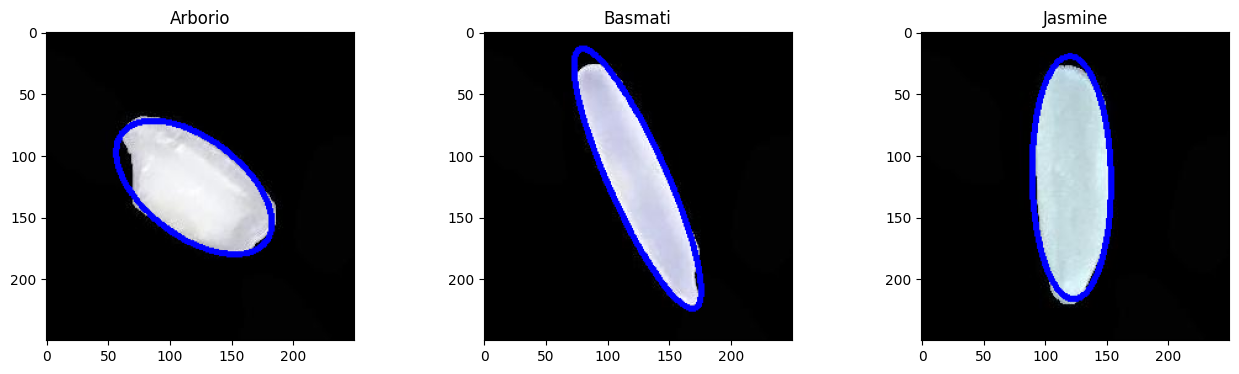

In [18]:
# plot example rice with ellipses
image1 = arborio_images[99].copy()
image2 = basmati_images[99].copy()
image3 = jasmine_images[99].copy()
fig, axes = plt.subplots(1,3, figsize=(16,4))
axes[0].set_title("Arborio")
axes[1].set_title("Basmati")
axes[2].set_title("Jasmine")
axes[0].imshow(cv.ellipse(image1, arborio_el[99], (0,0,255), 3))
axes[1].imshow(cv.ellipse(image2, basmati_el[99], (0,0,255), 3))
axes[2].imshow(cv.ellipse(image3, jasmine_el[99], (0,0,255), 3))

Above we have examples of each rice species plotted along with the fitted ellipse.

In [19]:
# calculate dimensional features
major_ax = []
minor_ax = []
area = []
perimeter = []
roundness = []
aspect_rat = []

# arborio
for i in range(100):
    current_el = arborio_el[i]
    major_ax.append(current_el[1][1])
    minor_ax.append(current_el[1][0])
    area.append(cv.contourArea(arborio_contours[i][0]))
    perimeter.append(cv.arcLength(arborio_contours[i][0], closed=True))
    # to calculate roundness we will use the formula 2*Pi*A / p^2, where p is perimeter and A is area
    round = (2* np.pi *area[i]) / perimeter[i]**2
    roundness.append(round)
    aspect_rat.append(major_ax[i] / minor_ax[i])

# basmati
for i in range(100):
    current_el = basmati_el[i]
    major_ax.append(current_el[1][1])
    minor_ax.append(current_el[1][0])
    area.append(cv.contourArea(basmati_contours[i][0]))
    perimeter.append(cv.arcLength(basmati_contours[i][0], closed=True))
    # to calculate roundness we will use the formula 2*Pi*A / p^2, where p is perimeter and A is area
    round = (2* np.pi *area[i]) / perimeter[i]**2
    roundness.append(round)
    aspect_rat.append(major_ax[i] / minor_ax[i])

# jasmine
for i in range(100):
    current_el = jasmine_el[i]
    major_ax.append(current_el[1][1])
    minor_ax.append(current_el[1][0])
    area.append(cv.contourArea(jasmine_contours[i][0]))
    perimeter.append(cv.arcLength(jasmine_contours[i][0], closed=True))
    # to calculate roundness we will use the formula 2*Pi*A / p^2, where p is perimeter and A is area
    round = (2* np.pi *area[i]) / perimeter[i]**2
    roundness.append(round)
    aspect_rat.append(major_ax[i] / minor_ax[i])

In [20]:
# finally add dimensional features to the dataframe
rice_df["major_ax"] = major_ax
rice_df["minor_ax"] = minor_ax
rice_df["area"] = area
rice_df["perimeter"] = perimeter
rice_df["roundness"] = roundness
rice_df["aspect_ratio"] = aspect_rat

In [21]:
# final check that dataframe has been constructed properly
display(rice_df[:5])
display(rice_df[100:105])
display(rice_df[200:205])

# finishing touches
rice_df["class"] = rice_df["class"].astype("category")

,img_name,class,r_ch_mean,g_ch_mean,b_ch_mean,r_ch_var,g_ch_var,b_ch_var,r_ch_skew,g_ch_skew,...,b_ch_kurt,r_ch_entr,g_ch_entr,b_ch_entr,major_ax,minor_ax,area,perimeter,roundness,aspect_ratio
0,Arborio (40),Arborio,188.911583,190.416081,198.192719,3247.204862,3316.704583,3469.948943,-2.703472,-2.684168,...,6.106680,6.045563,6.091364,6.061150,136.968338,68.869476,7265.0,358.676185,0.354822,1.988811
1,Arborio (497),Arborio,127.394872,128.387719,133.990148,10129.328287,10292.130780,11110.573857,-0.437042,-0.434355,...,-1.755517,4.819866,4.877391,5.080827,138.773895,70.211151,7569.5,362.835567,0.361266,1.976522
2,Arborio (618),Arborio,214.832157,215.252165,220.199814,3993.607635,4034.882064,4091.399531,-2.840389,-2.818786,...,6.955443,5.866805,5.888371,5.744295,145.249802,70.481583,7657.0,364.132030,0.362845,2.060819
3,Arborio (646),Arborio,191.939456,194.598039,199.078775,1669.888663,1722.853047,1735.316808,-3.904036,-3.862791,...,15.278504,5.806323,5.875341,5.803781,131.824158,59.666492,5945.0,326.132031,0.351192,2.209350
4,Arborio (839),Arborio,130.941315,131.168964,135.283707,11312.365074,11361.059937,11965.127991,-0.400995,-0.399494,...,-1.811003,4.333831,4.345524,4.567716,138.367218,72.871338,7779.0,367.421355,0.362055,1.898788


,img_name,class,r_ch_mean,g_ch_mean,b_ch_mean,r_ch_var,g_ch_var,b_ch_var,r_ch_skew,g_ch_skew,...,b_ch_kurt,r_ch_entr,g_ch_entr,b_ch_entr,major_ax,minor_ax,area,perimeter,roundness,aspect_ratio
100,Basmati (40),Basmati,54.602740,55.627260,59.547260,8702.582458,9030.367229,10249.506397,1.158497,1.155607,...,-0.669317,3.024367,2.997212,3.104269,202.846069,52.072083,7511.5,454.409161,0.354822,1.988811
101,Basmati (497),Basmati,65.873174,65.824300,68.636724,10821.480024,10811.536775,11682.255880,0.973188,0.973644,...,-1.042115,3.078212,3.065924,3.049949,202.968796,48.727039,7526.5,443.521859,0.361266,1.976522
102,Basmati (618),Basmati,85.373025,85.440089,92.302981,11797.250271,11819.031806,13607.118784,0.518788,0.518731,...,-1.718707,3.823034,3.825411,3.844860,230.206863,42.601345,6903.5,460.658942,0.362845,2.060819
103,Basmati (646),Basmati,82.018088,81.066200,91.961051,11147.352862,10906.229188,13835.565708,0.543994,0.545847,...,-1.700014,3.609189,3.628389,3.487506,215.162186,52.291988,8497.0,474.617311,0.351192,2.209350
104,Basmati (839),Basmati,65.175244,65.284383,71.503845,9540.411614,9574.488336,11353.181662,0.864463,0.864389,...,-1.240527,3.261636,3.289438,3.437873,193.351486,46.518341,6957.5,432.350286,0.362055,1.898788


,img_name,class,r_ch_mean,g_ch_mean,b_ch_mean,r_ch_var,g_ch_var,b_ch_var,r_ch_skew,g_ch_skew,...,b_ch_kurt,r_ch_entr,g_ch_entr,b_ch_entr,major_ax,minor_ax,area,perimeter,roundness,aspect_ratio
200,Jasmine (40),Jasmine,199.011728,198.700751,208.713212,3921.485294,3912.308654,4206.410881,-2.680071,-2.676403,...,5.529962,5.537402,5.549200,5.694966,149.464310,50.155060,5596.5,351.002090,0.354822,1.988811
201,Jasmine (497),Jasmine,80.308672,79.912270,82.385890,10247.796171,10152.663822,10684.339263,0.493662,0.493842,...,-1.741928,3.397640,3.405959,3.630175,165.297546,40.761093,5101.0,358.048770,0.361266,1.976522
202,Jasmine (618),Jasmine,94.153923,95.348972,100.743262,12221.001862,12527.002994,13832.081420,0.338918,0.339700,...,-1.868901,3.576131,3.673626,3.765015,138.506546,49.011440,5158.5,331.237588,0.362845,2.060819
203,Jasmine (646),Jasmine,140.350608,141.485948,148.726131,11364.023975,11505.759071,12612.676840,-0.522397,-0.523156,...,-1.703288,4.504922,4.586418,4.633863,150.998520,45.017204,5164.0,349.847760,0.351192,2.209350
204,Jasmine (839),Jasmine,121.497443,122.076294,128.979341,11407.526737,11505.054723,12679.163206,-0.222292,-0.223106,...,-1.927281,4.506031,4.497136,4.641374,161.431778,42.217300,5034.0,345.847760,0.362055,1.898788


In [22]:
# write data to file
datapath = "../training_data/rice_data.csv"
rice_df.to_csv(path_or_buf=datapath, mode="w")

We have now also extracted dimensional features which are the major and minor axes of the fitted ellipse, area and perimeter of the contour, roundness of the contour(value is between 0 and 1 where 1 means perfect circle), and aspect ratio of the ellipse. We have also saved the dataframe as "rice_data" in the "training_data" directory